# **Import Libs**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Import Dataset**

In [2]:
train1 = pd.read_csv('../input/sales-product-data/Sales_April_2019.csv')
train2 = pd.read_csv('../input/sales-product-data/Sales_August_2019.csv')
train3 = pd.read_csv('../input/sales-product-data/Sales_December_2019.csv')
train4 = pd.read_csv('../input/sales-product-data/Sales_February_2019.csv')
train5 = pd.read_csv('../input/sales-product-data/Sales_January_2019.csv')
train6 = pd.read_csv('../input/sales-product-data/Sales_July_2019.csv')
train7 = pd.read_csv('../input/sales-product-data/Sales_June_2019.csv')
train8 = pd.read_csv('../input/sales-product-data/Sales_March_2019.csv')
train9 = pd.read_csv('../input/sales-product-data/Sales_May_2019.csv')
train10 = pd.read_csv('../input/sales-product-data/Sales_November_2019.csv')
train11 = pd.read_csv('../input/sales-product-data/Sales_October_2019.csv')
train12 = pd.read_csv('../input/sales-product-data/Sales_September_2019.csv')

In [3]:
train1['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6'],
      dtype=object)

In [4]:
data = pd.concat([train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11,train12],axis=0)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# **EDA**

In [5]:
data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## **Clean The Data**

In [6]:
data.shape

(186850, 6)

In [7]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [10]:
data.shape

(186305, 6)

In [11]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


**There are some column name values in the data set**

In [12]:
data.drop(data[data['Quantity Ordered']=='Quantity Ordered'].index,inplace=True)

In [13]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(int)
data['Order ID']=data['Order ID'].astype(int)
data['Price Each']=data['Price Each'].astype(float)

In [14]:
data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

**separate the time from Order Date Column**

In [15]:
data['time'] = data['Order Date'].str[-6:-3]
data['Order Date'] = data['Order Date'].str[:8]

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09


**Convert Order Date Column in to_datetime**

In [17]:
data['Order Date']=pd.to_datetime(data['Order Date'])

**Set Order Date as an index column ,and separate month and year column** 

In [18]:
data = data.set_index('Order Date')
data['Year'] = data.index.year
data['Month']=data.index.month

In [19]:
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,time,Year,Month
Order Date,,,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08,2019,4
2019-04-07,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22,2019,4
2019-04-12,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",14,2019,4
2019-04-12,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14,2019,4
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09,2019,4
...,...,...,...,...,...,...,...,...
2019-09-17,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",20,2019,9
2019-09-01,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",16,2019,9
2019-09-23,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",07,2019,9


In [20]:
data.dtypes,data.isna().sum()

(Order ID              int64
 Product              object
 Quantity Ordered      int64
 Price Each          float64
 Purchase Address     object
 time                 object
 Year                  int64
 Month                 int64
 dtype: object,
 Order ID            0
 Product             0
 Quantity Ordered    0
 Price Each          0
 Purchase Address    0
 time                0
 Year                0
 Month               0
 dtype: int64)

In [21]:
#create a Sales column = Price * Quantity
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [22]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,time,Year,Month,Sales
Order Date,,,,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08,2019,4,23.90
2019-04-07,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22,2019,4,99.99
2019-04-12,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",14,2019,4,600.00
2019-04-12,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14,2019,4,11.99
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09,2019,4,11.99


## **Data Analysis**

## **Total Price in each month in Tabular form**

In [23]:
x = data.groupby(["Year", "Month"])['Sales'].sum()
data_wide = x.unstack()
data_wide.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,1813586.44,2202022.42,2807100.38,3390670.24,3152606.75,2577802.26,2647775.76,2244467.88,2097560.13,3736726.88,3199603.2,4613443.34
2020,8670.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Total Price weekly in Tabular Form**

In [24]:
data['Sales'].resample("w").sum().head()

Order Date
2019-01-06    344855.67
2019-01-13    409428.28
2019-01-20    394936.90
2019-01-27    426632.16
2019-02-03    460355.55
Freq: W-SUN, Name: Sales, dtype: float64

In [25]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Purchase Address    0
time                0
Year                0
Month               0
Sales               0
dtype: int64

In [26]:
data['Sales'].rolling(window=2).sum()

Order Date
2019-04-19        NaN
2019-04-07     123.89
2019-04-12     699.99
2019-04-12     611.99
2019-04-30      23.98
               ...   
2019-09-17      20.92
2019-09-01     708.97
2019-09-23    1400.00
2019-09-19    1079.99
2019-09-30     391.94
Name: Sales, Length: 185950, dtype: float64

## **Visualizing**

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

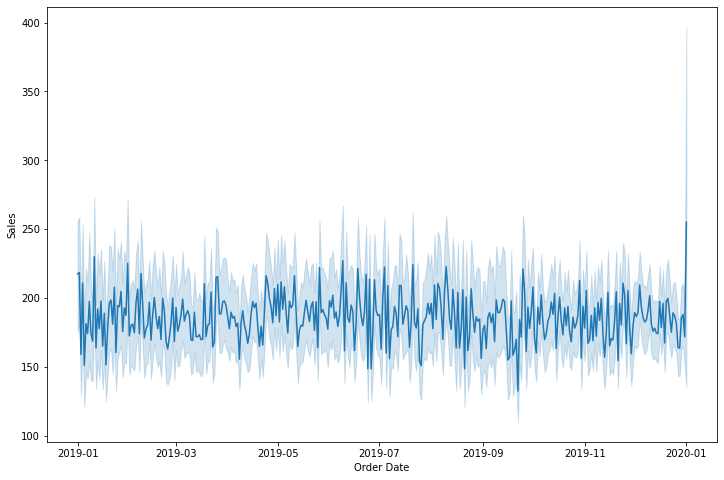

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data['Sales'])

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

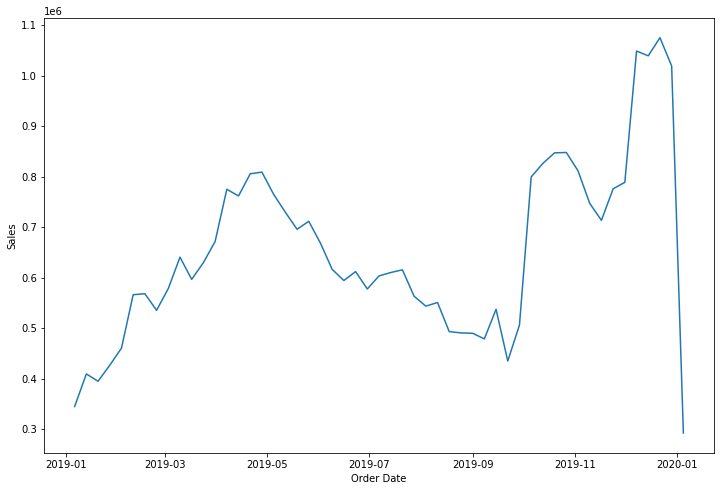

In [28]:
# weekly Price Value
resampled = data['Sales'].resample("w").sum() 
plt.figure(figsize=(12,8))
sns.lineplot(data = resampled)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

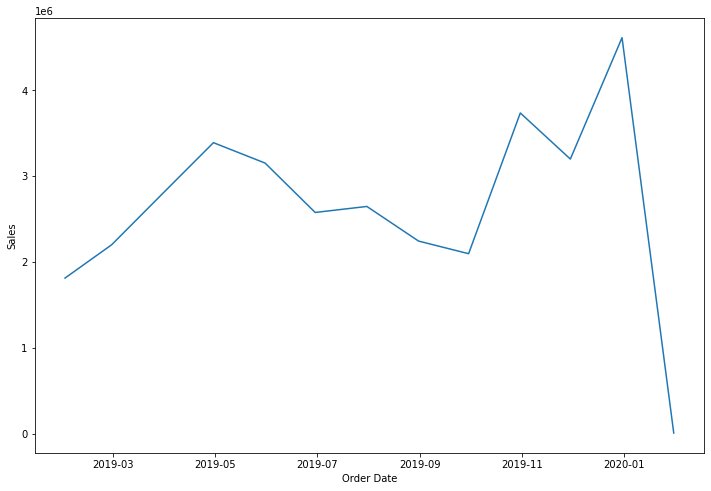

In [29]:
# Monthly Price Value
resampled = data['Sales'].resample("m").sum() 
plt.figure(figsize=(12,8))
sns.lineplot(data = resampled)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

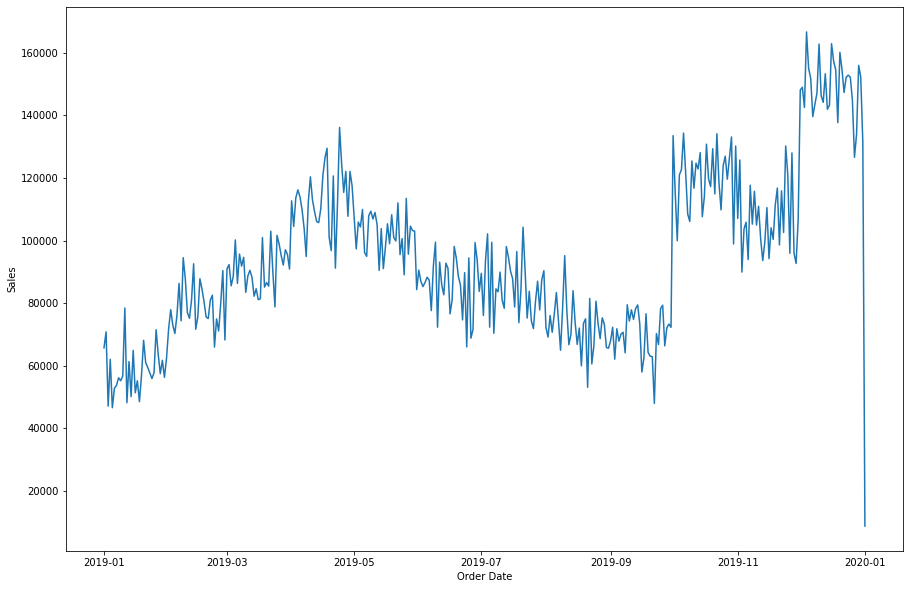

In [30]:
# Daily Price Value
resampled = data['Sales'].resample("d").sum() 
plt.figure(figsize=(15,10))
sns.lineplot(data = resampled)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

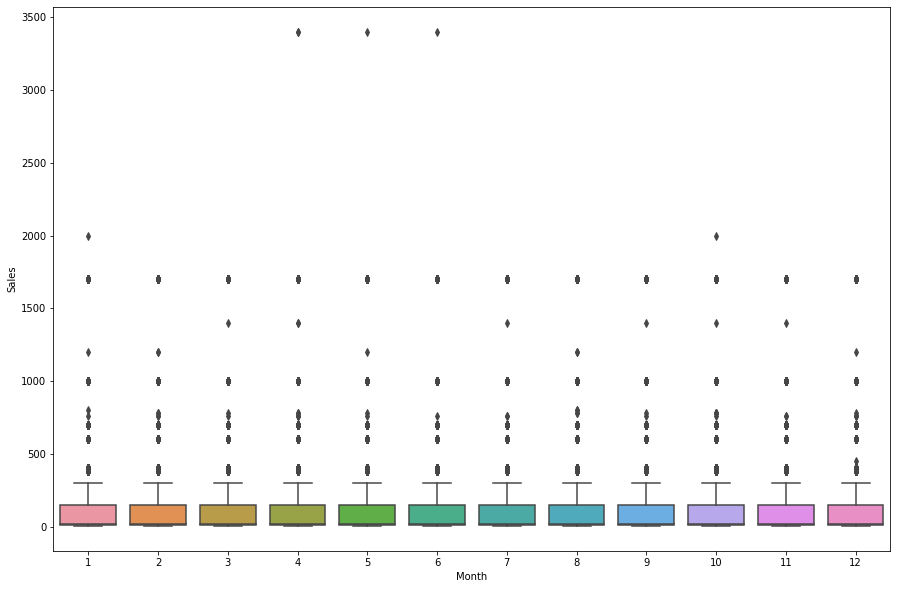

In [31]:
# boxplots by month
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Month', y='Sales', data = data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

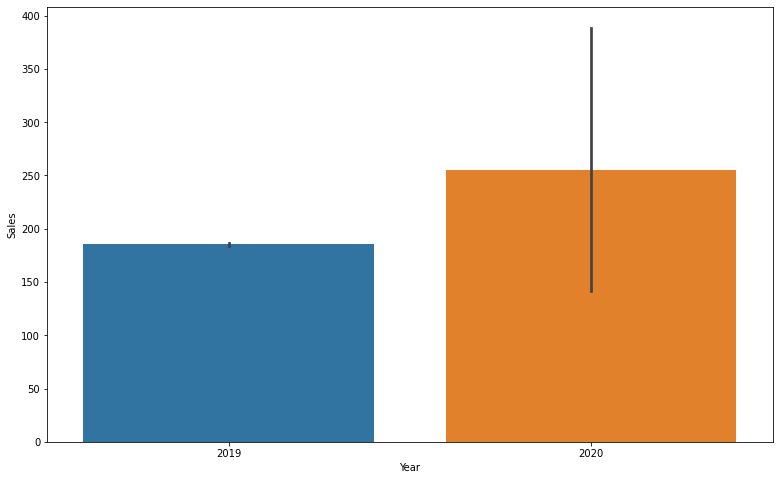

In [32]:
# barplots by year
plt.figure(figsize=(13,8))
sns.barplot(x = 'Year', y='Sales', data = data)

<AxesSubplot:xlabel='Month', ylabel='Sales'>

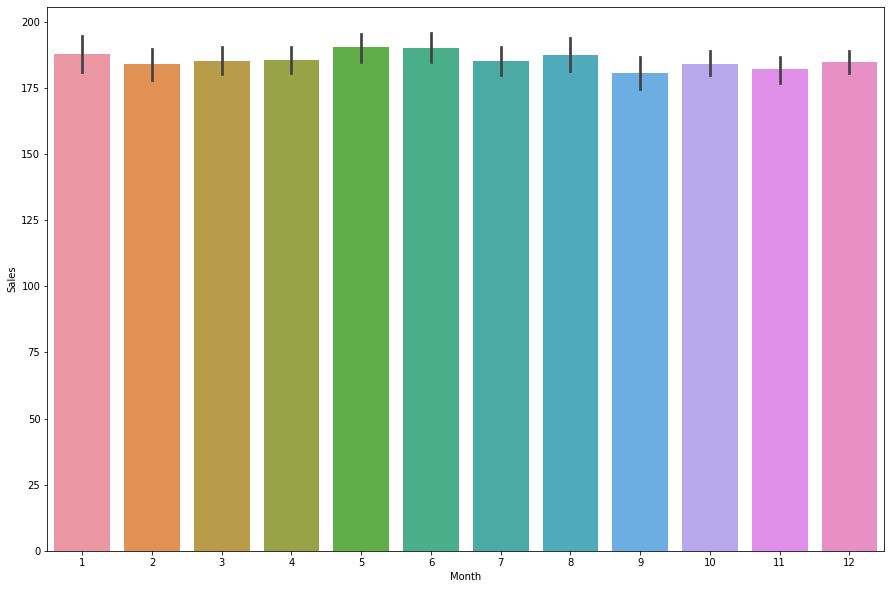

In [33]:
# barplots by month
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y='Sales', data = data)